In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# Homework 1
### Edwin Jaramillo (00320842)

### 1. Assume we implemented an algorithm that has complexity approximately $n log(n)$. How much faster is this implementation compared to one of complexity $n^2$?

In [2]:
r = pd.DataFrame()
r['n'] = np.arange(1,10,1)

In [3]:
r['log(n)'] = np.log2(r['n'])
r['nlog(n)'] = r['n'] * r['log(n)']
r['n^2'] = np.power(r['n'],2)

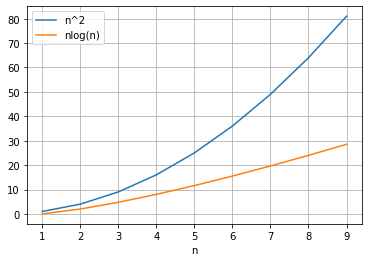

In [4]:
r.plot(x='n', y=['n^2', 'nlog(n)'])#, logy=True)
plt.grid()

### 2. The runtime of an algorithm is captured in the following table:

As precissely as possible, estimate the function that describes the growth of the runtime 

|$n$  | runtime -- $T(n)$|
|---- | ----- |
|1000|0.0|
|2000|0.02|
|4000|0.2|
|8000|0.6|
|16000|2.6|
|32000|10.4|
|64000|41.6|

### 3. By estimating the number of operations as a function of $n$, estimate the complexity of the following function

```
def func1(n):                                n=1
    A = range(0,n)
    sum = 0
    i = 0
    for x in A[i:]:
        i += 1
        for j in range(i, len(A)):
            y = A[j]
            k = j
            while k < len(A):
                z = A[k]
                k = 2*k
                if x + y <= z:
                    sum += 1
    return sum
```

### 4. From class, remember the code we use to get the sum of the first $n$ positive integers:

```
def sum1(n):
    total = 0
    for i in range(1, n+1):
        total += i
    return total
```

Now consider a different function that does the same thing.

```
def sum2(n): 
    total = n*(n+1)//2
    return total
```

1. Run the two functions and make sure that they return the same outputs. Use $n = 5, 8, 103, 527$
2. Use Python time library to estimate the runtime for inputs of $n = [1, 10, 10^2, 10^3, 10^4, 10^5, 10^6, 10^7, 10^8, 10^9]$
3. Plot the runtime as a function of $n$ for both functions in the same figure. 
    - Use different line colors and markers to help distinguish between the two curves. 
4. Analytically estime the runtime functions for the functions `sum1` and `sum2`. Call them $T_1(n)$ and $T_2(n)$.
    - Note that the times obtained in your computer will be different to the ones shown in class since the speed and memory of the computers used to run the code are likely different
5. How long will it take to run the code for $n = 10^{100}$ using `sum1` and `sum2`? What are your main impressions about the difference?

**Hint:** Use and modify the code from the slides to get and plot the runtime


### 5. Prove that the running time of an algorithm is $\Theta(g(n))$ if and only if its worst-case running time is $O(g(n))$ and its best-case running time is $\Omega(g(n))$

For the best case, there exists a $n_0$ and $c_1$ so that for $n > n_1$:

$0 \leq c_1 g(n) \leq T_1(n)$

for the worst case, there exists a $n_1$ and $c_2$ so that for $n > n_2$

$0 \leq T_2(n) \leq c_2 g(n)$

Then for $n > max(n_1, n_2)$

$0 \leq c_1 g(n) \leq T_1(n) \leq T_2(n) \leq c_2 g(n)$

since the execution time is between $T_1$ and $T_2,$ the execution time is $\Theta(g(n))$

### 6.  Sort the following functions in decreasing order of asymptotic complexity ($O(f(n))$):

- $f_1(n) = \sqrt{n}$
- $f_2(n) = n^3$
- $f_3(n) = {n\choose 4}$
- $f_4(n) = \sum_{i=2}^n (i-1)$

### 7. Implement the methods of the class `Array` that deal with deletion of elements. Consider the 3 cases we considered in class.

In [5]:
import ctypes

class Array(object):
    """
    Implementation of the array data structure
    """

    def __init__(self, n, values=None):
        self.l = 0
        self.n = n
        self.array = self._create_array(self.n)
        if values:
            self.initialize_array(values)  
            
    def _create_array(self, n):
        """
        Creates a new array of capacity n
        """
        return (n * ctypes.py_object)()
                
        
    def __getitem__(self, item_index):
        """
        Return element at item_index
        """
        if (item_index < 0) or (item_index >= self.n):
            raise IndexError('index out of range!')
        try:
            x = self.array[item_index]
        except ValueError:
            x = None
        return x
    
    def __setitem__(self, item_index, item):
        """
        Set element at item_index
        """
        if (item_index < 0) or (item_index >= self.n):
            raise IndexError('index out of range!')
        if not self[item_index]:
            self.item_count += 1
        self.array[item_index] = item
    
    def initialize_array(self, values):
        """
        Initialize array
        """
        if self.n != len(values):
            raise ValueError("element count different than capacity")
        for item in values:
            self.array[self.item_count] = item
            self.item_count += 1
            
    def list_array(self):
        """
        List elements of the array
        using list comprehension
        """
        return ", ".join(str(x) if x is not None else '_' for x in self)

    
    def insert(self, index, element):
        """
        implementation of insert
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        if (index < 0) or (index > self.l):
            raise IndexError('index out of range!')
        x = self.l
        while x > index:
            self.array[x] = self.array[x-1]
            x -= 1
        self.array[index] = element
        self.l += 1    


    def delete(self, index):
        """
        implementation of delete
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        if (index < 0) or (index >= self.l):
            raise IndexError('index out of range!')

        for x in range(index, self.l-1):
            self.array[x] = self.array[x+1]

        self.array[self.l - 1] = None
        self.l -= 1

In [6]:
# Create the array
X = Array(10)

In [7]:
# Insert elements at different positions
X.insert(0,3)
X.insert(0,2)
X.insert(0,1)
X.insert(2,5)
X.insert(3,6)
X.list_array()

'1, 2, 5, 6, 3, _, _, _, _, _'

In [8]:
# Delete at the beginning
X.delete(0)
X.list_array()

'2, 5, 6, 3, _, _, _, _, _, _'

In [9]:
# Delete in the middle
X.delete(2)
X.list_array()

'2, 5, 3, _, _, _, _, _, _, _'

In [10]:
# Delete at the end
X.delete(1)
X.list_array()

'2, 3, _, _, _, _, _, _, _, _'